# Iris Flower Dataset

The Iris flower data set, also known as Fisher's Iris data set, was introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper titled "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. It is alternatively referred to as Anderson's Iris data set as Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers from three related species. The data was collected from two of the three species in the Gaspé Peninsula, from the same pasture, on the same day, and measured at the same time by the same person with the same apparatus. Fisher's paper was published in the journal "Annals of Eugenics," which has since created controversy about the ethical use of the Iris dataset for teaching statistical techniques in modern times.

The data set comprises 50 samples from each of the three species of Iris (Iris setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample, including the length and width of the sepals and petals, all measured in centimeters. Fisher used these four features to develop a linear discriminant model that can distinguish the different species from each other.

![https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)

source image:https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png

[Attribute Information:](https://archive.ics.uci.edu/ml/datasets/iris)
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
- Iris Setosa
- Iris Versicolour
- Iris Virginica

## Read and visualize the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("tab10")

import io
import urllib.request
from scipy.io import arff

import bk_clustering
from bk_clustering import BurjKhalifaClustering

In [2]:
dataset_url = "https://raw.githubusercontent.com/IvanReznikov/bk_clustering/main/data/examples_csv/iris.csv"

In [3]:
iris = pd.read_csv(dataset_url)

In [4]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
#Frequency distribution of species"
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

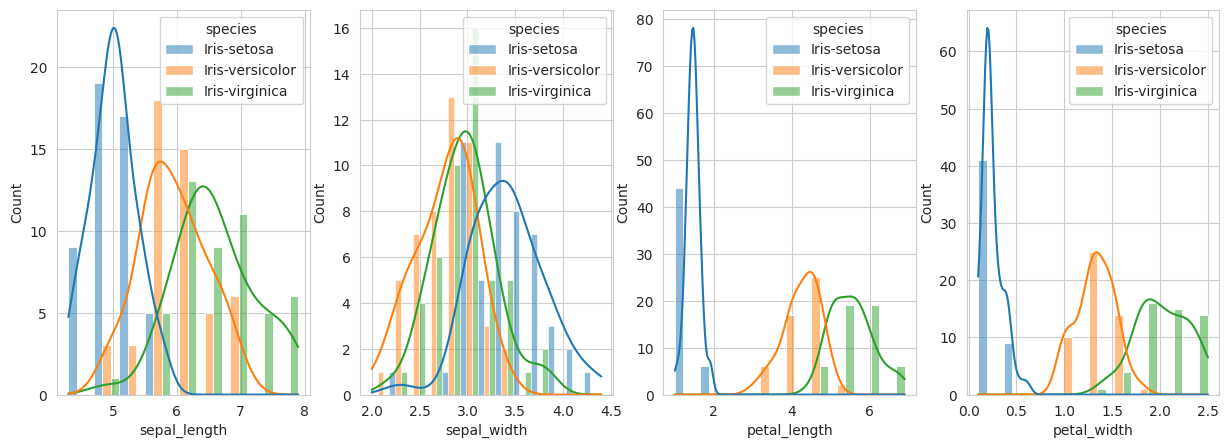

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for idx, col in enumerate(iris.columns[:-1]):
    sns.histplot(data=iris, x=col, hue="species", ax=axs[idx], multiple="dodge", kde=True)

/home/ivan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


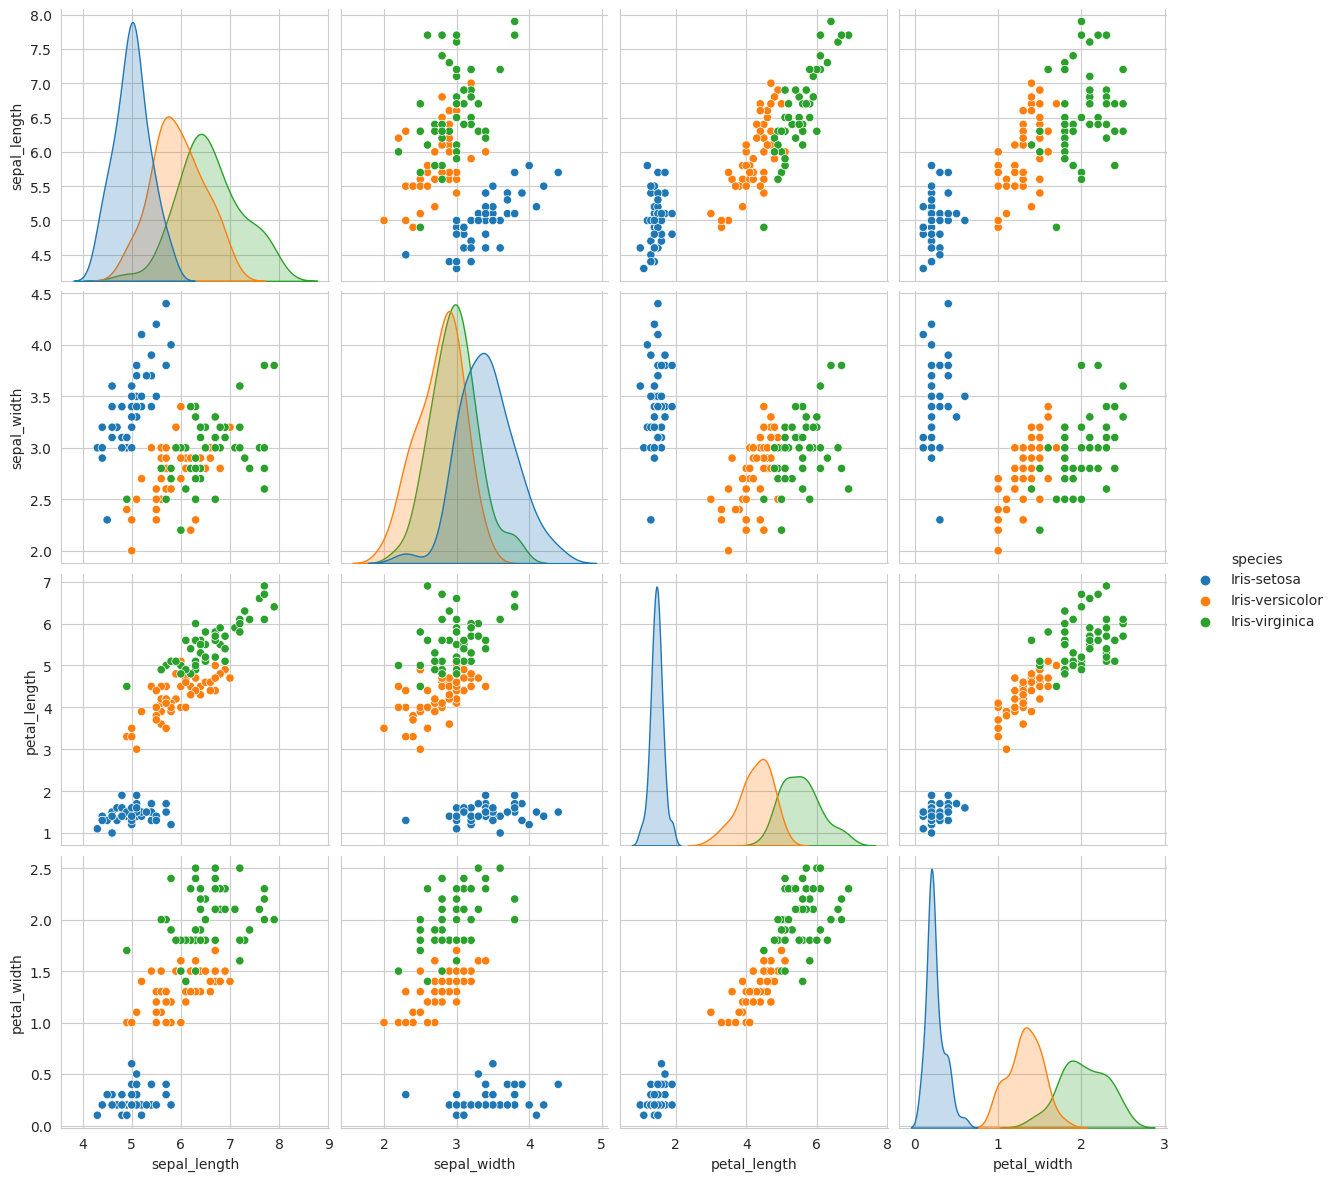

In [7]:
sns.pairplot(iris,hue="species",size=3);
plt.show()

# How to Implementing Burj Khalifa Clustering ?

A lot of algorithms have clear instructions how to choose parameters, number of clusters, etc.

For Burj Khalifa clustering method - you just plug the data.


In [8]:
bk_model = BurjKhalifaClustering()

In [9]:
bk_model.fit(iris.iloc[:, :-1])

## Results

In [10]:
# color mappings
_, correct_list = bk_clustering.utilities.metrics.get_correct_list(iris.iloc[:,-1], bk_model.labels_)
iris_color_map = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}

Text(0.5, 1.0, 'Errors')

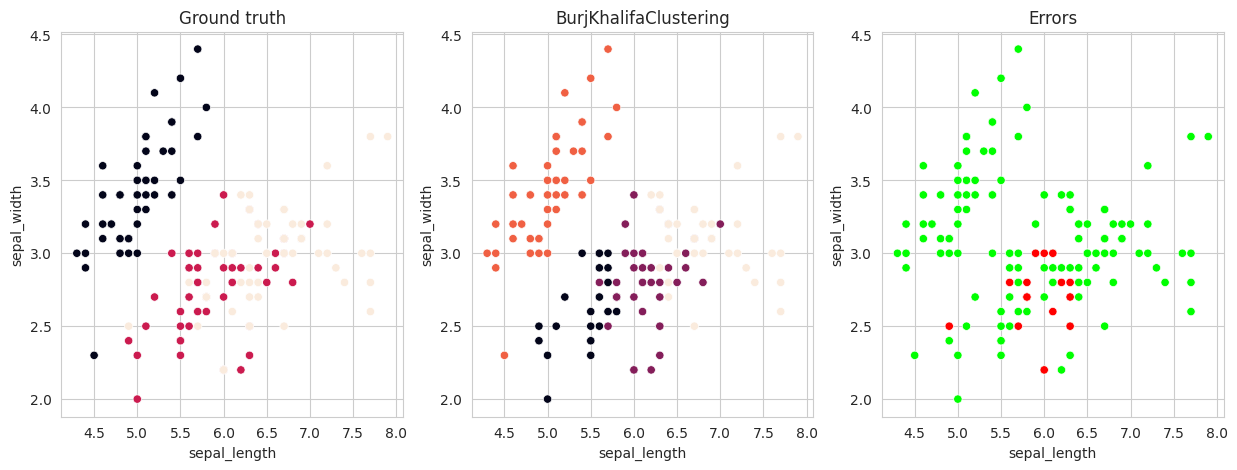

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(
    x=iris.iloc[:,0], y=iris.iloc[:,1], c=[iris_color_map[x] for x in iris.iloc[:,-1]], ax=axs[0]
)
axs[0].set_title("Ground truth")
sns.scatterplot(
    x=iris.iloc[:,0], y=iris.iloc[:,1], c=[x for x in bk_model.labels_], ax=axs[1]
)
axs[1].set_title("BurjKhalifaClustering")

cmap = ListedColormap([[0, 1, 0], [1, 0, 0]]) if sum(correct_list) == iris.shape[0] else ListedColormap([[1, 0, 0], [0, 1, 0]])

sns.scatterplot(
    x=iris.iloc[:,0], y=iris.iloc[:,1], c=correct_list, cmap=cmap, ax=axs[2]
)
axs[2].set_title("Errors")

In [12]:
bk_model.n_clusters

4

Yes, as we know the true number of clusters is 3. The algorithm believes, though, that there is a clear cluster of each of the kind, and a hybrid of versicolor and virginica, due to large overlapping. Can't blame the algorithm too much, based on plots.

There is a way to specify the number of clusters:

### Changing the number of clusters

In [13]:
bk_model = BurjKhalifaClustering(n_clusters = 3)

In [14]:
bk_model.fit(iris.iloc[:, :-1])

Text(0.5, 1.0, 'Errors')

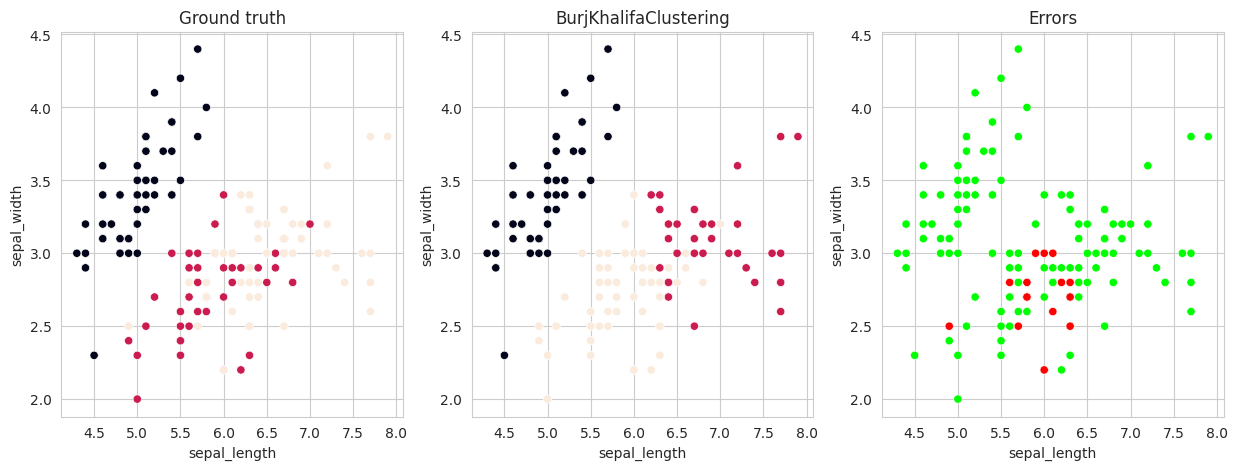

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(
    x=iris.iloc[:,0], y=iris.iloc[:,1], c=[iris_color_map[x] for x in iris.iloc[:,-1]], ax=axs[0]
)
axs[0].set_title("Ground truth")
sns.scatterplot(
    x=iris.iloc[:,0], y=iris.iloc[:,1], c=[x for x in bk_model.labels_], ax=axs[1]
)
axs[1].set_title("BurjKhalifaClustering")

cmap = ListedColormap([[0, 1, 0], [1, 0, 0]]) if sum(correct_list) == iris.shape[0] else ListedColormap([[1, 0, 0], [0, 1, 0]])

sns.scatterplot(
    x=iris.iloc[:,0], y=iris.iloc[:,1], c=correct_list, cmap=cmap, ax=axs[2]
)
axs[2].set_title("Errors")

In [16]:
bk_model.n_clusters

3